In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker

sns.set_theme()

In [2]:
PRODUCT_ID = '8360E6D158AEBD26BBBE835C38F88748'
PATH_TO_DATA = '../data/WB_hack_3.csv'
COL_NAMES = 'utc_event_time, utc_event_date, user_id, \
    city_name, event_action, id, brand, variant, currency,\
    price100, qty, grand_total100, os_manufacturer, device_type, traffic_src_kind, \
    app_version, net_type, locale'.replace(' ', '').split(',')

In [3]:
data = pd.read_csv(PATH_TO_DATA, names=COL_NAMES)

In [4]:
data

,utc_event_time,utc_event_date,user_id,city_name,event_action,id,brand,variant,currency,price100,qty,grand_total100,os_manufacturer,device_type,traffic_src_kind,app_version,net_type,locale
0,2021-10-01 19:40:22,2021-10-01,11090758688966051676,Могилёв,['view_item'],['BEFC96A9D6DEA3A9817BC5E5157B0A1C'],['6B0630D20C913739C8164D8208A1B13D'],['3B9A6121A509CBADC049AEABD3ED0223'],['RUB'],[231100],[1],[231100],Xiaomi,smartphone,mobile,4.3.4000,Wi-Fi,ru
1,2021-10-01 19:40:22,2021-10-01,11090758688966051676,Могилёв,['add_to_cart'],['BEFC96A9D6DEA3A9817BC5E5157B0A1C'],['6B0630D20C913739C8164D8208A1B13D'],['3B9A6121A509CBADC049AEABD3ED0223'],['RUB'],[248500],[1],[248500],Xiaomi,smartphone,mobile,4.3.4000,Wi-Fi,ru
2,2021-10-01 07:50:59,2021-10-01,12487687213536341095,Самара,['view_item'],['97F9B1135CF24F4CFFF4664435AEC2B9'],['FA74FF059207A1569295D3E83CA88E53'],['3B9A6121A509CBADC049AEABD3ED0223'],['RUB'],[75400],[1],[75400],samsung,smartphone,mobile,4.2.7000,3G,ru
3,2021-10-02 11:51:12,2021-10-02,12487687213536341095,Самара,['view_item'],['97F9B1135CF24F4CFFF4664435AEC2B9'],['FA74FF059207A1569295D3E83CA88E53'],['3B9A6121A509CBADC049AEABD3ED0223'],['RUB'],[74500],[1],[74500],samsung,smartphone,mobile,4.2.7000,3G,ru
4,2021-10-03 15:06:38,2021-10-03,10383386994170804641,Москва,['view_item'],['7D9A98C6E8BF033613B74252D9D24B33'],['681425F1391C8CA4026B28066C7B3B4A'],['3B9A6121A509CBADC049AEABD3ED0223'],['RUB'],[131900],[1],[131900],samsung,smartphone,mobile,4.3.1003,4G,ru
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713341,2021-10-10 11:13:11,2021-10-10,13331229260693292116,Екатеринбург,['begin_checkout'],['8360E6D158AEBD26BBBE835C38F88748'],['54C53BB4CEB1938D929A930E4FFC4BE5'],['43FCC4D7C1455DAAD680C4F142A539FB'],['RUB'],[1382400],[1],[1382400],samsung,smartphone,mobile,4.2.9000,2G,ru
2713342,2021-10-10 12:10:52,2021-10-10,13331229260693292116,Екатеринбург,['begin_checkout'],['8360E6D158AEBD26BBBE835C38F88748'],['54C53BB4CEB1938D929A930E4FFC4BE5'],['43FCC4D7C1455DAAD680C4F142A539FB'],['RUB'],[1382400],[1],[1382400],samsung,smartphone,mobile,4.2.9000,2G,ru
2713343,2021-10-10 11:39:28,2021-10-10,10985970864871842613,Москва,['view_item'],['BDBD23C5359EF7B3F85763C032892B85'],['0B1BC368C77D7A9B58F26B087958C231'],['3B9A6121A509CBADC049AEABD3ED0223'],['RUB'],[2309200],[1],[2309200],HUAWEI,smartphone,mobile,4.2.5000-huawei,4G,ru
2713344,2021-10-10 11:02:27,2021-10-10,12409157986873686868,Москва,['view_item'],['97F9B1135CF24F4CFFF4664435AEC2B9'],['FA74FF059207A1569295D3E83CA88E53'],['3B9A6121A509CBADC049AEABD3ED0223'],['RUB'],[74900],[1],[74900],samsung,smartphone,mobile,4.3.1003,Wi-Fi,ru


In [6]:
unpack = ['event_action', 'id', 'brand', 'variant', 'currency', 'price100', 'qty', 'grand_total100']

In [7]:
for col in unpack:
    data[col] = data[col].apply(lambda x: x[1:-1].replace("'", "").split(','))

In [9]:
# df = data.explode(['event_action', 'id', 'brand', 'variant', 'currency', 'price100', 'qty', 'grand_total100'])
df = pd.read_csv('../data/processed.csv')

In [11]:
df

,utc_event_time,utc_event_date,user_id,city_name,event_action,id,brand,variant,currency,price100,qty,grand_total100,os_manufacturer,device_type,traffic_src_kind,app_version,net_type,locale
0,2021-10-01 19:40:22,2021-10-01,11090758688966051676,Могилёв,add_to_cart,BEFC96A9D6DEA3A9817BC5E5157B0A1C,6B0630D20C913739C8164D8208A1B13D,3B9A6121A509CBADC049AEABD3ED0223,RUB,248500,1,248500,Xiaomi,smartphone,mobile,4.3.4000,Wi-Fi,ru
1,2021-10-01 07:50:59,2021-10-01,12487687213536341095,Самара,view_item,97F9B1135CF24F4CFFF4664435AEC2B9,FA74FF059207A1569295D3E83CA88E53,3B9A6121A509CBADC049AEABD3ED0223,RUB,75400,1,75400,samsung,smartphone,mobile,4.2.7000,3G,ru
2,2021-10-02 11:51:12,2021-10-02,12487687213536341095,Самара,view_item,97F9B1135CF24F4CFFF4664435AEC2B9,FA74FF059207A1569295D3E83CA88E53,3B9A6121A509CBADC049AEABD3ED0223,RUB,74500,1,74500,samsung,smartphone,mobile,4.2.7000,3G,ru
3,2021-10-03 15:06:38,2021-10-03,10383386994170804641,Москва,view_item,7D9A98C6E8BF033613B74252D9D24B33,681425F1391C8CA4026B28066C7B3B4A,3B9A6121A509CBADC049AEABD3ED0223,RUB,131900,1,131900,samsung,smartphone,mobile,4.3.1003,4G,ru
4,2021-10-21 19:43:45,2021-10-21,12954672620163632510,Москва,remove_from_cart,B0270133170E1B886F4FA77B7E1F0EB9,7921BD71B70D139454324A845115B9E3,50D05F0ABB80F2B62C5F67F057E88D5F,RUB,1077100,1,1077100,samsung,smartphone,mobile,4.3.5000,Wi-Fi,ru
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450081,2021-10-10 11:13:11,2021-10-10,13331229260693292116,Екатеринбург,begin_checkout,8360E6D158AEBD26BBBE835C38F88748,54C53BB4CEB1938D929A930E4FFC4BE5,43FCC4D7C1455DAAD680C4F142A539FB,RUB,1382400,1,1382400,samsung,smartphone,mobile,4.2.9000,2G,ru
3450082,2021-10-10 12:10:52,2021-10-10,13331229260693292116,Екатеринбург,begin_checkout,8360E6D158AEBD26BBBE835C38F88748,54C53BB4CEB1938D929A930E4FFC4BE5,43FCC4D7C1455DAAD680C4F142A539FB,RUB,1382400,1,1382400,samsung,smartphone,mobile,4.2.9000,2G,ru
3450083,2021-10-10 11:39:28,2021-10-10,10985970864871842613,Москва,view_item,BDBD23C5359EF7B3F85763C032892B85,0B1BC368C77D7A9B58F26B087958C231,3B9A6121A509CBADC049AEABD3ED0223,RUB,2309200,1,2309200,HUAWEI,smartphone,mobile,4.2.5000-huawei,4G,ru
3450084,2021-10-10 11:02:27,2021-10-10,12409157986873686868,Москва,view_item,97F9B1135CF24F4CFFF4664435AEC2B9,FA74FF059207A1569295D3E83CA88E53,3B9A6121A509CBADC049AEABD3ED0223,RUB,74900,1,74900,samsung,smartphone,mobile,4.3.1003,Wi-Fi,ru


In [12]:
def demand_graph(df: pd.DataFrame, 
                 target_column: str,
                 target_value: str, 
                 event_action: str = 'purchase',
                 frequency: str = None,
                 start_date: str = '2021-09-31 00:00:00',
                 end_date: str = '2021-10-30 00:00:00') -> dict:
    df = df[[target_column, 'utc_event_time', 'event_action']]
    mask = (df['date'] > start_date) & (df['date'] <= end_date)
    df = df.loc[mask]
    df['utc_event_time'] = pd.to_datetime(df['utc_event_time'])
    result = df.query(f"{target_column} == '{target_value}' and event_action == '{event_action}'") \
        .set_index('utc_event_time').groupby(pd.Grouper(freq=frequency)).count()['event_action']
    result = result.to_dict()
    return {str(key.date()): result[key] for key in result}

In [14]:
res = demand_graph(df, 'id', PRODUCT_ID, 'purchase', frequency='D')

In [15]:
res

{'2021-09-01': 56,
 '2021-09-02': 68,
 '2021-09-03': 51,
 '2021-09-04': 47,
 '2021-09-05': 66,
 '2021-09-06': 46,
 '2021-09-07': 82,
 '2021-09-08': 62,
 '2021-09-09': 77,
 '2021-09-10': 87,
 '2021-09-11': 55,
 '2021-09-12': 58,
 '2021-09-13': 79,
 '2021-09-14': 64,
 '2021-09-15': 80,
 '2021-09-16': 89,
 '2021-09-17': 54,
 '2021-09-18': 70,
 '2021-09-19': 87,
 '2021-09-20': 53,
 '2021-09-21': 100,
 '2021-09-22': 88,
 '2021-09-23': 90,
 '2021-09-24': 203,
 '2021-09-25': 211,
 '2021-09-26': 205,
 '2021-09-27': 143,
 '2021-09-28': 214,
 '2021-09-29': 179,
 '2021-09-30': 195,
 '2021-10-01': 220,
 '2021-10-02': 171,
 '2021-10-03': 139,
 '2021-10-04': 153,
 '2021-10-05': 134,
 '2021-10-06': 213,
 '2021-10-07': 233,
 '2021-10-08': 193,
 '2021-10-09': 79,
 '2021-10-10': 58,
 '2021-10-11': 16,
 '2021-10-12': 22,
 '2021-10-13': 19,
 '2021-10-14': 37,
 '2021-10-15': 29,
 '2021-10-16': 32,
 '2021-10-17': 30,
 '2021-10-18': 41,
 '2021-10-19': 47,
 '2021-10-20': 97,
 '2021-10-21': 85,
 '2021-10-22': 

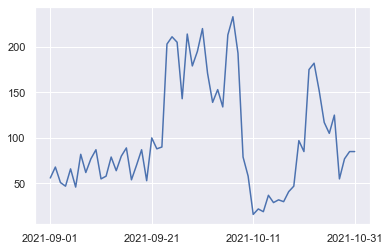

In [16]:
ax = sns.lineplot(x=list(res.keys()), y=list(res.values()))
ax.xaxis.set_major_locator(ticker.MultipleLocator(20));